In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from tensorflow import keras
import tensorflow as tf

In [3]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [4]:
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

In [5]:
df = pd.read_pickle('mywafer.pkl')

In [6]:
df.head()

,index,diesize,lotname,waferindex,waferdims,train_test_label,failure_type,check_tuple,wafermap_reshape
0,0,1683.0,lot1,1.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,1683.0,lot1,2.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,1683.0,lot1,3.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,1683.0,lot1,4.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,1683.0,lot1,5.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745630 entries, 0 to 745629
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             745630 non-null  int64  
 1   diesize           745630 non-null  float64
 2   lotname           745630 non-null  object 
 3   waferindex        745630 non-null  float64
 4   waferdims         745630 non-null  object 
 5   train_test_label  171350 non-null  object 
 6   failure_type      171350 non-null  object 
 7   check_tuple       745630 non-null  bool   
 8   wafermap_reshape  745630 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 46.2+ MB


In [8]:
df_train = df[df['train_test_label']=='Training']
df_test = df[df['train_test_label']=='Test']
df_real = df[df['train_test_label'].isna()]

In [9]:
df_train.reset_index(inplace = True)
df_test.reset_index(inplace = True)
df_real.reset_index(inplace = True)
print(df_train.head(), df_test.head(), df_real.head())

   level_0  index  diesize lotname  waferindex waferdims train_test_label  \
0        0      0   1683.0    lot1         1.0  (45, 48)         Training   
1        1      1   1683.0    lot1         2.0  (45, 48)         Training   
2        2      2   1683.0    lot1         3.0  (45, 48)         Training   
3        3      3   1683.0    lot1         4.0  (45, 48)         Training   
4        4      4   1683.0    lot1         5.0  (45, 48)         Training   

  failure_type  check_tuple                                   wafermap_reshape  
0         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      level_0   index  diesize   lotname  waferindex w

In [10]:
df_train.drop(['level_0', 'index'], axis = 1, inplace = True)
df_test.drop(['level_0', 'index'], axis = 1, inplace = True)
df_real.drop(['level_0', 'index'], axis = 1, inplace = True)

C:\Users\sohye\AppData\Local\Temp\ipykernel_6736\2479246445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['level_0', 'index'], axis = 1, inplace = True)
C:\Users\sohye\AppData\Local\Temp\ipykernel_6736\2479246445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['level_0', 'index'], axis = 1, inplace = True)
C:\Users\sohye\AppData\Local\Temp\ipykernel_6736\2479246445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [11]:
np.unique(df_train['failure_type'], return_counts = True)

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype=object),
 array([ 3415,   408,  2355,  7856,  1487,    54,   595,   394, 36341],
       dtype=int64))

In [12]:
np.unique(df_test['failure_type'], return_counts = True)

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype=object),
 array([   832,    146,   2772,   1126,   1971,     95,    257,    686,
        110560], dtype=int64))

In [13]:
np.unique(df_real['failure_type'], return_counts = True)

(array([nan, nan, nan, ..., nan, nan, nan], dtype=object),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

## 1. 결측 패턴 확인

In [14]:
img, count = np.unique(df_train['failure_type'], return_counts = True)

def check_failure(df, img_list):
    ct, e = 0, 0
    fig, axes = plt.subplots(3,3, figsize = (15,15))
    for i in range(len(img_list)):
        filter1 = img_list[i]
        data = df[df['failure_type'] == filter1]
        index = data.index[12]
        axes[e][ct].imshow(data['wafermap_reshape'][index], cmap = 'gray')
        title_font = {'fontsize': 16, 'fontweight': 'bold'}
        axes[e][ct].set_title(img_list[i], fontdict = title_font)
        ct += 1
        if (i == 2) | (i == 5):
            e += 1
            ct = 0
            
def check_failuretype(df, img_list):
    ct, e = 0, 0
    fig, axes = plt.subplots(3,3, figsize = (15,15))
    for i in range(len(img_list)):
        filter1 = img_list[i]
        data = df[df['failure_type'] == filter1]
        index = data.index[0]
        axes[e][ct].imshow(data['wafermap_reshape'][index], cmap = 'RdPu')
        title_font = {'fontsize': 20, 'fontweight': 'bold'}
        axes[e][ct].set_title(img_list[i], fontdict = title_font)
        ct += 1
        if (i == 2) | (i == 5):
            e += 1
            ct = 0

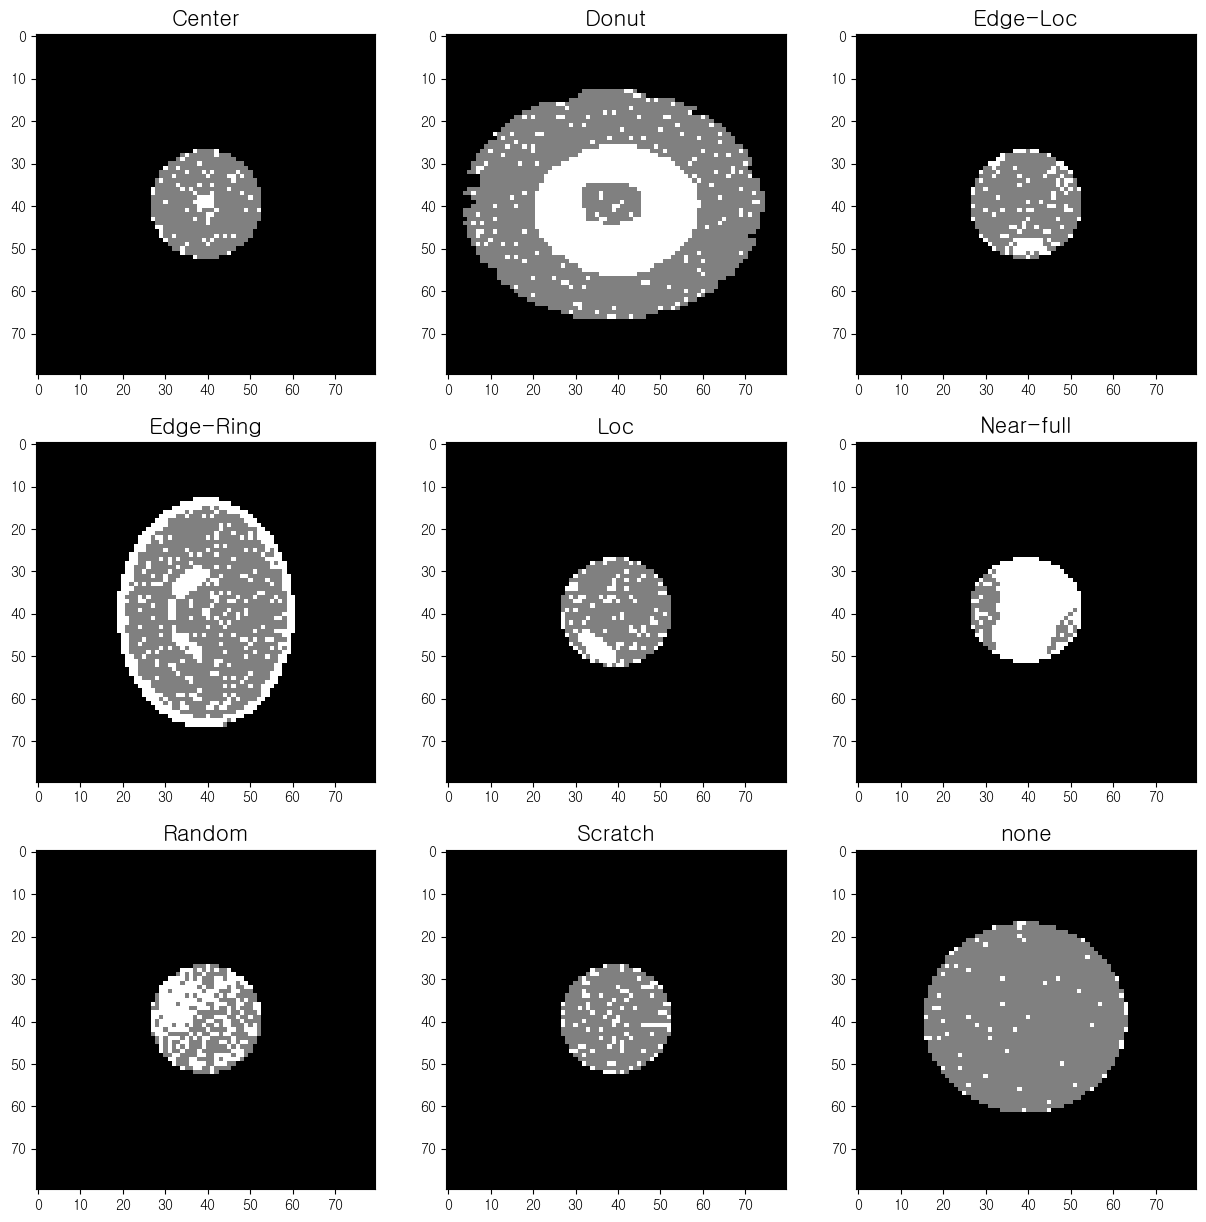

In [15]:
check_failure(df_train, img) # Donut, Edge-Ring 

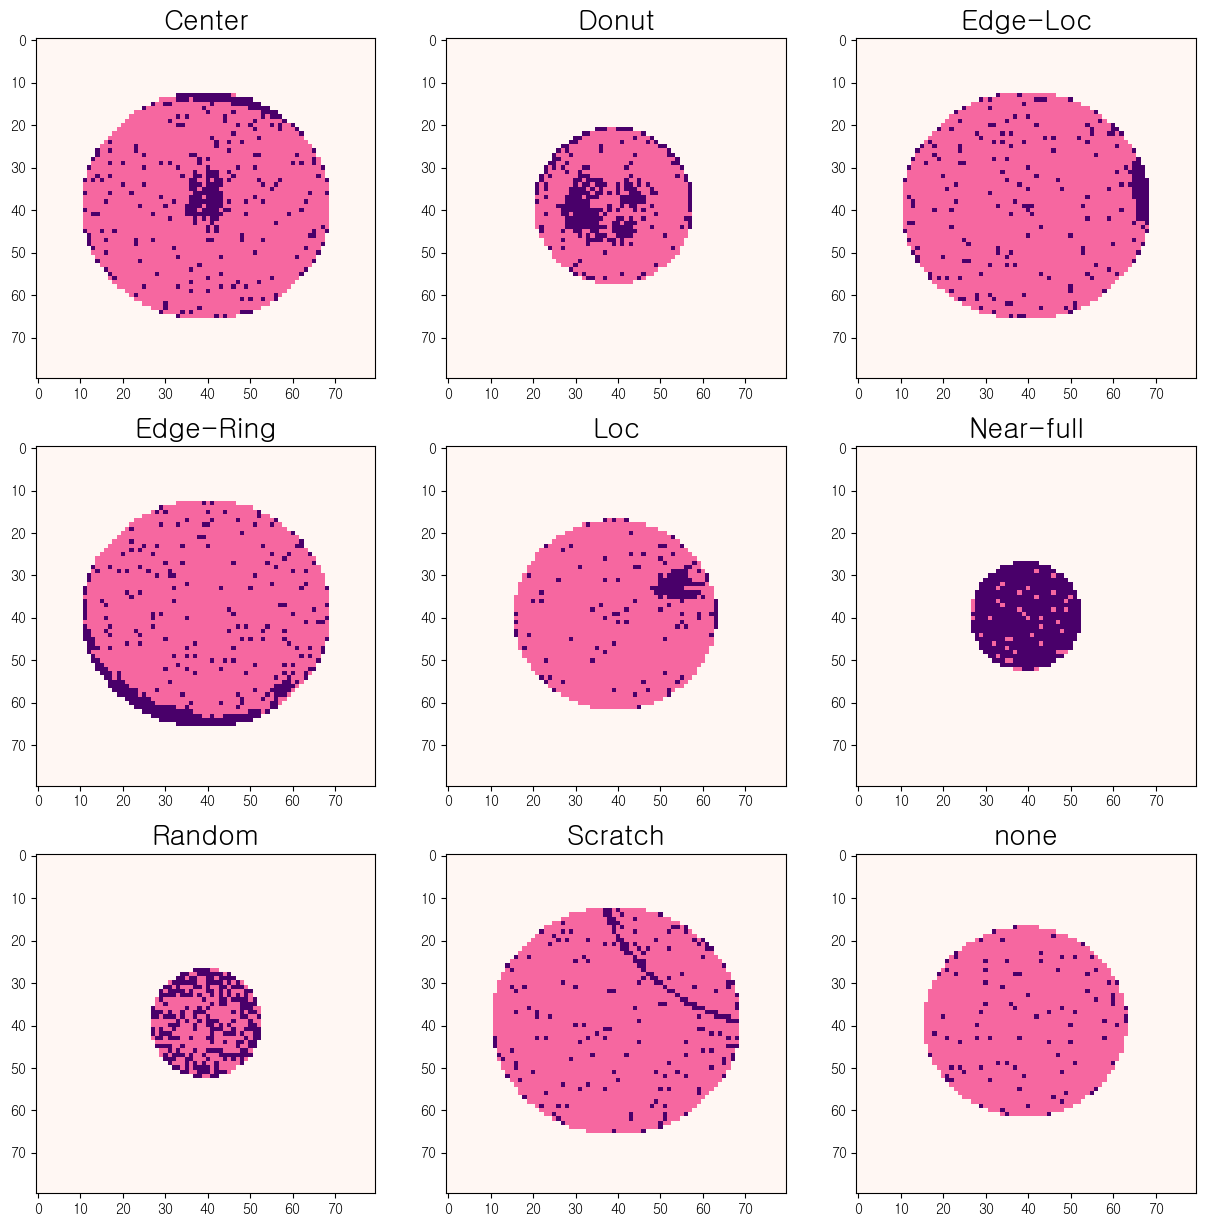

In [16]:
check_failuretype(df_train, img) # Center, Edge-Loc, Near-full

## 2. lot num별로 통계치 분석 

In [17]:
df11 = df[['lotname', 'diesize']]
df11.head()

,lotname,diesize
0,lot1,1683.0
1,lot1,1683.0
2,lot1,1683.0
3,lot1,1683.0
4,lot1,1683.0


In [18]:
g1 = df11.groupby('lotname').aggregate([np.mean])
g1

,diesize
,mean
lotname,
lot1,1683.00
lot10,533.00
lot100,533.00
lot10000,904.00
lot10001,904.00
...,...
lot9995,2006.88
lot9996,2006.36


Text(0.5, 1.0, 'lot별 diesize 평균의 분포')

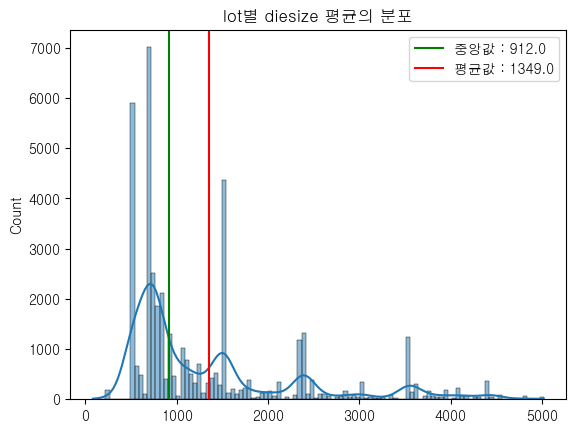

In [19]:
ax = sns.histplot(data = g1, kde = True, legend=True)
ax.axvline(g1.iloc[:, 0].median(), color='g', linewidth=1.5, label='중앙값 : '+ str(round(g1.iloc[:, 0].median(), 0)))
ax.axvline(g1.iloc[:, 0].mean(), color = 'r', linewidth = 1.5, label='평균값 : '+ str(round(g1.iloc[:, 0].mean(), 0)))
ax.legend()
ax.set_title('lot별 diesize 평균의 분포', fontweight =  'bold')

## lot number 별 waferdims and waferdims별 failure_type 확인

In [20]:
ex_df = df[['lotname', 'diesize', 'waferdims', 'failure_type']]
ex_df.head()

,lotname,diesize,waferdims,failure_type
0,lot1,1683.0,"(45, 48)",none
1,lot1,1683.0,"(45, 48)",none
2,lot1,1683.0,"(45, 48)",none
3,lot1,1683.0,"(45, 48)",none
4,lot1,1683.0,"(45, 48)",none


In [21]:
g2 = ex_df.groupby(['lotname', 'waferdims']).count()
g2

,,diesize,failure_type
lotname,waferdims,,
lot1,"(45, 48)",25,25
lot10,"(26, 26)",25,24
lot100,"(26, 26)",25,24
lot10000,"(34, 34)",2,0
lot10001,"(34, 34)",2,0
...,...,...,...
lot9995,"(42, 61)",25,4
lot9996,"(42, 61)",25,0
lot9997,"(34, 34)",23,5


## lot number별 들어가는 wafer 갯수
- 대부분의 <span style='background-color:#fff5b1'> 한 번의 lot 마다 wafer는 대략 25개</span>가 들어간다.

C:\Users\sohye\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'lot별 wafer 갯수')

<Figure size 1000x500 with 0 Axes>

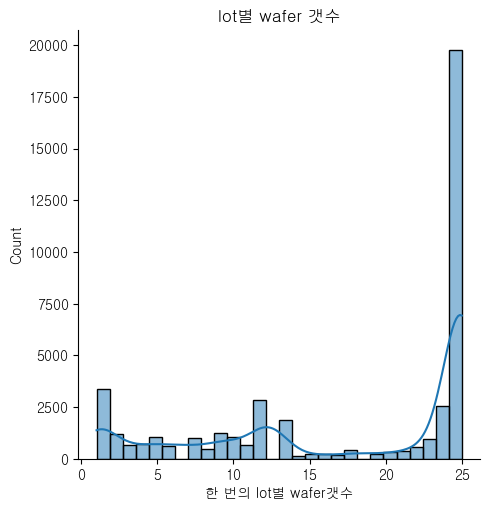

In [22]:
plt.figure(figsize = (10,5))
sns.displot(data = g2.iloc[:, 0], kde = True)
plt.xlabel('한 번의 lot별 wafer갯수', fontsize=10)
plt.title('lot별 wafer 갯수', weight = 'bold')

### wafer shape 별 상위 20개의 갯수

(0.0, 100000.0)

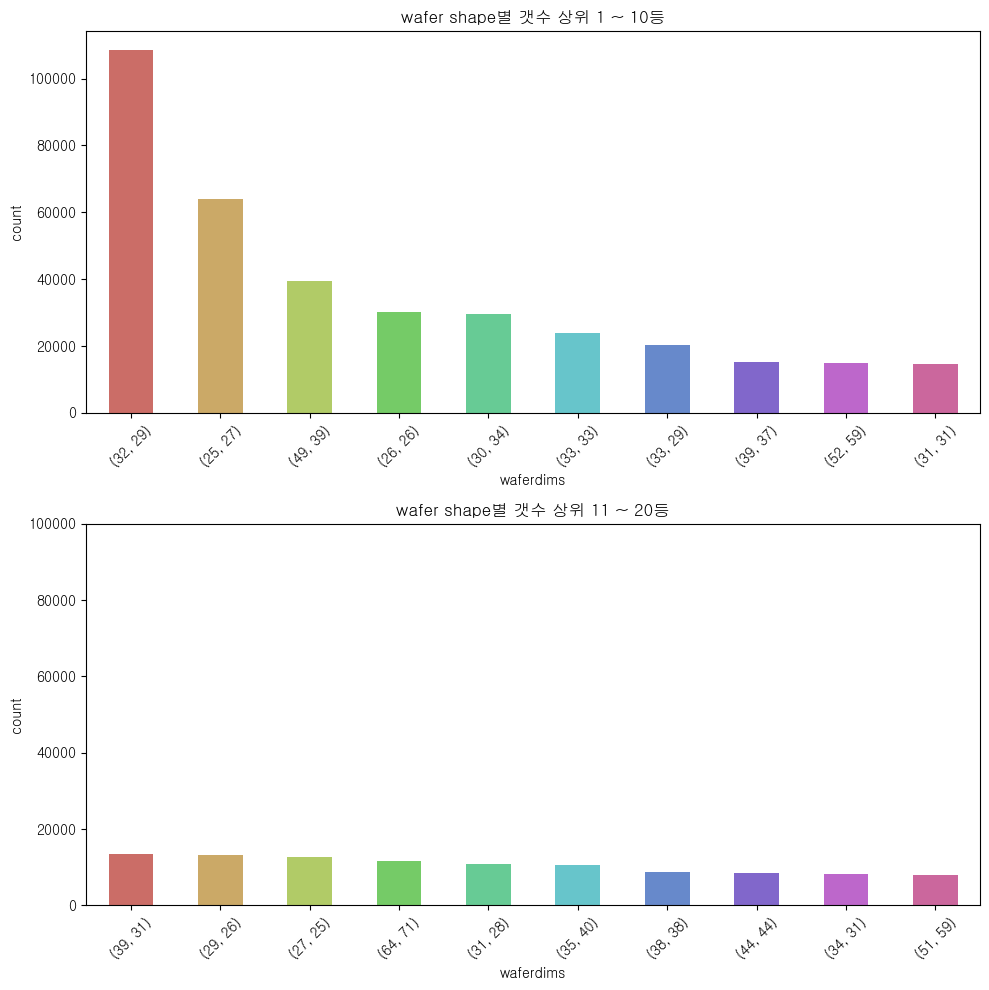

In [23]:
fig, axes = plt.subplots(2,1, figsize=(10,10),layout = 'tight')
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls', 
              saturation=0.75,
              width=0.5, 
              order = ex_df['waferdims'].value_counts().index[:10],
              ax = axes[0])
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls',
              saturation=0.75,
              width=0.5,
              order = ex_df['waferdims'].value_counts().index[10:20],
              ax = axes[1])



axes[0].set_title('wafer shape별 갯수 상위 1 ~ 10등')
axes[0].set_xticklabels(ex_df['waferdims'].value_counts().index[:10], rotation = 45)
axes[1].set_title('wafer shape별 갯수 상위 11 ~ 20등')
axes[1].set_xticklabels(ex_df['waferdims'].value_counts().index[10:20], rotation = 45)
axes[1].set_ylim([0,100000])

### wafer shape별 failure_type
1. <span style='background-color:#fff5b1'> 특정 wafer shape에서 특정 failure_type만 나온다면 그 wafer의 문제를 의심해보아야한다. </span>

[Text(0, 0, '(39, 31)'),
 Text(1, 0, '(29, 26)'),
 Text(2, 0, '(27, 25)'),
 Text(3, 0, '(64, 71)'),
 Text(4, 0, '(31, 28)'),
 Text(5, 0, '(35, 40)'),
 Text(6, 0, '(38, 38)'),
 Text(7, 0, '(44, 44)'),
 Text(8, 0, '(34, 31)'),
 Text(9, 0, '(51, 59)')]

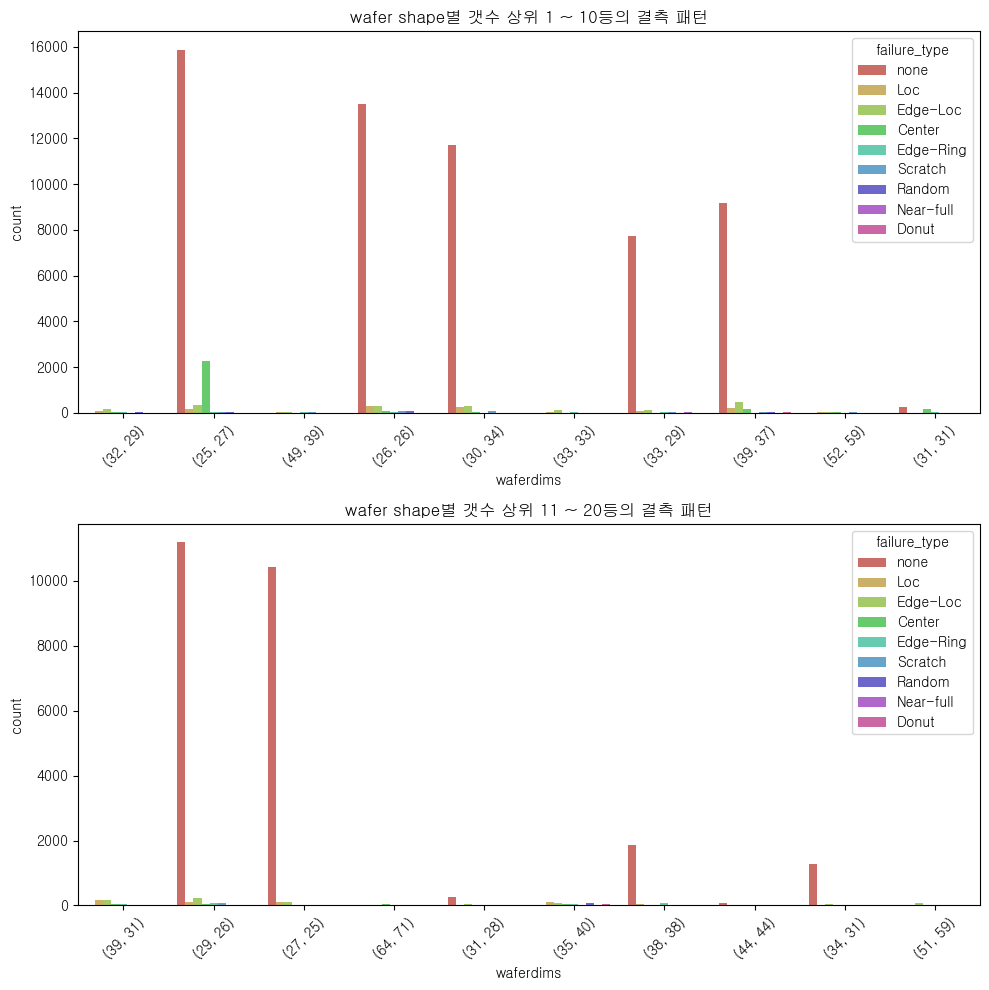

In [24]:
fig, axes = plt.subplots(2,1, figsize=(10,10),layout = 'tight')
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls',
              hue = 'failure_type',
              order = ex_df['waferdims'].value_counts().index[:10],
              ax = axes[0])
sns.countplot(data = ex_df,
              x = 'waferdims',
              palette = 'hls',
              hue = 'failure_type',
              order = ex_df['waferdims'].value_counts().index[10:20],
              ax = axes[1])

axes[0].set_title('wafer shape별 갯수 상위 1 ~ 10등의 결측 패턴')
axes[0].set_xticklabels(ex_df['waferdims'].value_counts().index[:10], rotation = 45)
axes[1].set_title('wafer shape별 갯수 상위 11 ~ 20등의 결측 패턴')
axes[1].set_xticklabels(ex_df['waferdims'].value_counts().index[10:20], rotation = 45)

### none 때문에 정확한 시각화가 안되기 때문에 none를 제외하고 결측 패턴만 확인
***조금 쉽게 확인하기 위해 failure_type를 category labeling 진행***

In [25]:
ex_df['failure_cat'] = ex_df['failure_type'].astype('category').cat.codes

C:\Users\sohye\AppData\Local\Temp\ipykernel_6736\3996801134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['failure_cat'] = ex_df['failure_type'].astype('category').cat.codes


In [26]:
ex_df.head()

,lotname,diesize,waferdims,failure_type,failure_cat
0,lot1,1683.0,"(45, 48)",none,8
1,lot1,1683.0,"(45, 48)",none,8
2,lot1,1683.0,"(45, 48)",none,8
3,lot1,1683.0,"(45, 48)",none,8
4,lot1,1683.0,"(45, 48)",none,8


In [27]:
filter2 = ex_df['failure_cat'] == 8
ex_df.drop(ex_df['failure_cat'][filter2].index, axis = 0, inplace = True)

C:\Users\sohye\AppData\Local\Temp\ipykernel_6736\1335769634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df.drop(ex_df['failure_cat'][filter2].index, axis = 0, inplace = True)


[Text(0, 0, '(64, 71)'),
 Text(1, 0, '(35, 40)'),
 Text(2, 0, '(31, 28)'),
 Text(3, 0, '(44, 44)'),
 Text(4, 0, '(51, 59)'),
 Text(5, 0, '(38, 38)'),
 Text(6, 0, '(34, 31)'),
 Text(7, 0, '(39, 37)'),
 Text(8, 0, '(56, 41)'),
 Text(9, 0, '(72, 72)')]

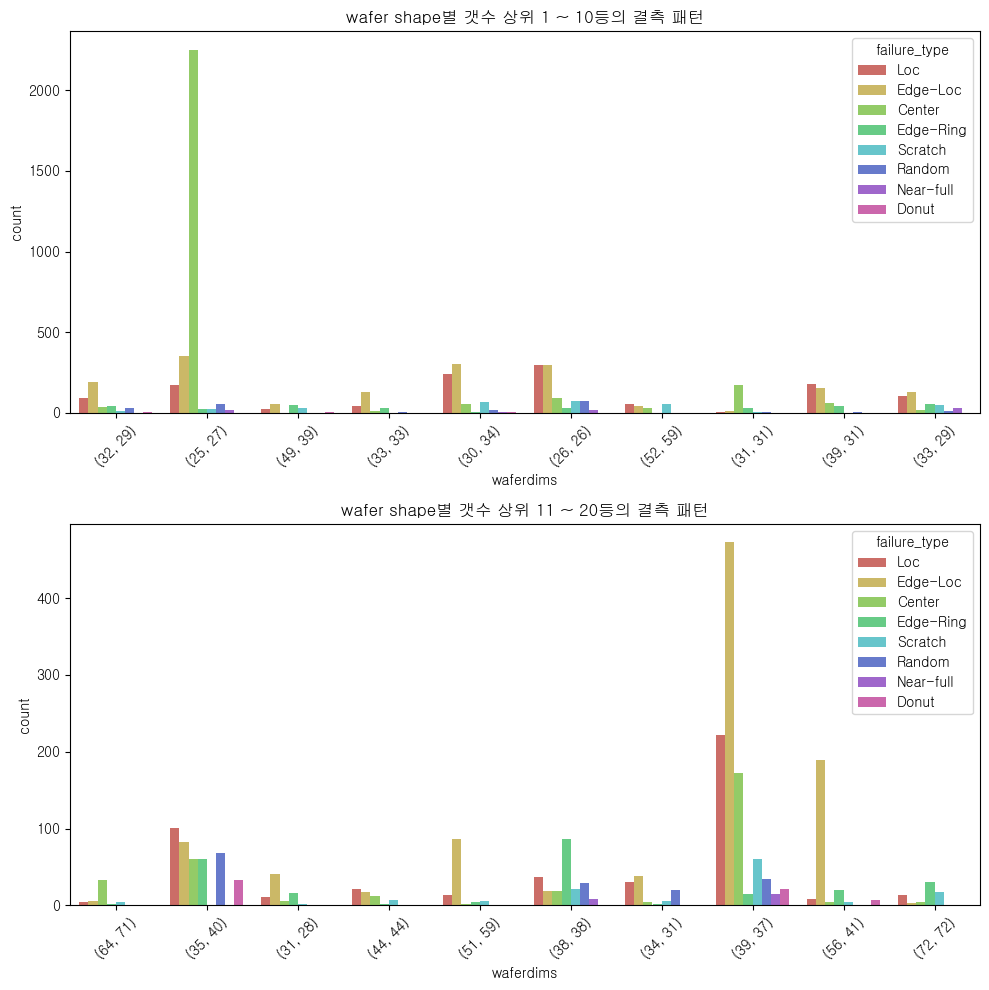

In [28]:
fig, axes = plt.subplots(2,1, figsize=(10,10),layout = 'tight')
sns.countplot(data = ex_df, 
              x = 'waferdims',
              palette = 'hls', 
              saturation=0.75,
              width=0.8, 
              hue = 'failure_type', 
              order = ex_df['waferdims'].value_counts().index[:10],
              ax = axes[0])
sns.countplot(data = ex_df, 
              x = 'waferdims', 
              palette = 'hls',
              hue = 'failure_type',
              saturation=0.75,
              width=0.8,
              order = ex_df['waferdims'].value_counts().index[10:20],
              ax = axes[1])

axes[0].set_title('wafer shape별 갯수 상위 1 ~ 10등의 결측 패턴')
axes[0].set_xticklabels(ex_df['waferdims'].value_counts().index[:10], rotation = 45)
axes[1].set_title('wafer shape별 갯수 상위 11 ~ 20등의 결측 패턴')
axes[1].set_xticklabels(ex_df['waferdims'].value_counts().index[10:20], rotation = 45)

### <span style='background-color:#fff5b1'> (25, 27), (39,37)의 wafer들은 공정의 문제보다 wafer의 문제를 의심해 보아야한다.

# <span style='background-color:#fff5b1'> 모델 설정 </span>
1. ***CNN***
2. ***DecisionTree***
3. ***RandomForest***
4. ***Flatten 후 DNN***

In [29]:
print(len(df_train))
print(df_train.shape)
print(len(df_test))
print(len(df_real))

52905
(52905, 8)
118445
574280


In [30]:
y_train = df_train['failure_type'].astype('category').cat.codes
y_test = df_test['failure_type'].astype('category').cat.codes

### X_train, X_test CNN을 돌릴 수 있는 형태로 변환

In [31]:
X_tr = df_train['wafermap_reshape'].apply(lambda x: np.array(x)).to_numpy()
X_train = np.array([x for x in X_tr])

X_te = df_test['wafermap_reshape'].apply(lambda x: np.array(x)).to_numpy()
X_test = np.array([x for x in X_te])

In [33]:
print(X_train.shape, X_test.shape)

(52905, 80, 80) (118445, 80, 80)


In [34]:
# CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5,5), activation = 'relu', input_shape=(80, 80, 1),
                       padding = 'valid', data_format = 'channels_last'), # 2D는 평면
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(32, kernel_size = (5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9)
])


model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
         optimizer = keras.optimizers.Adam(learning_rate = 0.001),
         metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 76, 76, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 38, 38, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 9248)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [35]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1654/1654 [==============================] - 212s 128ms/step - loss: 0.2698 - accuracy: 0.9242
Epoch 2/10
1654/1654 [==============================] - 218s 132ms/step - loss: 0.1076 - accuracy: 0.9662
Epoch 3/10
1654/1654 [==============================] - 213s 129ms/step - loss: 0.0742 - accuracy: 0.9772
Epoch 4/10
1654/1654 [==============================] - 213s 129ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 5/10
1654/1654 [==============================] - 214s 130ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 6/10
1654/1654 [==============================] - 214s 129ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 7/10
1654/1654 [==============================] - 213s 129ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 8/10
1654/1654 [==============================] - 216s 131ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 9/10
1654/1654 [==============================] - 212s 128ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 10/10
1654/1654 [=======================

In [ ]:
# CNN 
kernel size 크게하면 한번 큰부분을 처리 ==> weight 갯수 많아짐
kernel size 가지고 놀아보기
weight을 저장했다가 불러와서 분석 ==> 시각화
# Tree
# Flatten